# Air Bnb Geoplotting

Geospatial visualisation and data analysis has long been an area of personal interest for me, but has always seemed to fall to the periphery of more standard raw data science and graphical visuals.
To try and get some handson familiarity and practice with geospatial visualisation, a good and readily accessible sourced to start with felt like __[Inside Air BnB](http://insideairbnb.com/get-the-data)__, an open source data repository focused on collecting data around Air BnB in specific city areas of various countries as a means of assessing the deeper impact of the companies property letting on urban communities

For this example, I chose to go semi-local and take a look at the Air BnB data in Dublin, which in the last decade or so, has become massively unlivable for both low to average salary earners, and especially young people. 

To begin with, two files are needed from the web page for both the raw data and the related geospatial data used to render onto a readable map; `listings.csv` and `neighbourhoods.geojson`

To begin with, read in the listings data to a pandas dataframe

In [5]:
dub_listings = pd.read_csv('listings.csv')
dub_listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,8.440000e+03,8.440000e+03,0.0,8440.000000,8440.000000,8440.000000,8440.000000,8440.000000,6689.000000,8440.000000,8440.000000,8440.000000,0.0
mean,2.733412e+17,1.395853e+08,NaN,53.345449,-6.255111,181.120498,6.184716,31.159005,1.291769,5.366588,75.978791,8.196919,NaN
std,3.738527e+17,1.507540e+08,NaN,0.046388,0.062639,562.541185,29.167667,68.372446,1.882547,12.511049,111.235354,19.460945,NaN
min,4.407700e+04,4.398400e+04,NaN,53.207663,-6.497588,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.933922e+07,2.754379e+07,NaN,53.327961,-6.278417,70.000000,1.000000,1.000000,0.140000,1.000000,0.000000,0.000000,NaN
50%,3.598778e+07,7.335573e+07,NaN,53.344160,-6.259215,115.000000,2.000000,6.000000,0.600000,1.000000,9.000000,0.000000,NaN
75%,6.970116e+17,2.029741e+08,NaN,53.357097,-6.233293,200.000000,4.000000,27.000000,1.750000,3.000000,117.250000,7.000000,NaN
max,9.101728e+17,5.191105e+08,NaN,53.623490,-6.052910,46513.000000,1125.000000,1218.000000,40.070000,76.000000,365.000000,538.000000,NaN


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pysal
import geoplot.crs as gcrs
import geoplot as gplt

Not all the features will be of use in the spatial plotting or relay much meaningful information, so just selecting some of the most pertinent properties of the rentals for the dataframe

In [9]:
cols = ['id', 'neighbourhood_group', 'latitude', 'longitude','number_of_reviews','price']
dub_listings = dub_listings[cols]

Having all the relevant columns, we can then take a look at the properties of each of the features and see how they are distributed

In [16]:
dub_listings.describe()

,id,neighbourhood_group,latitude,longitude,number_of_reviews,price
count,8.440000e+03,0.0,8440.000000,8440.000000,8440.000000,8440.000000
mean,2.733412e+17,NaN,53.345449,-6.255111,31.159005,181.120498
std,3.738527e+17,NaN,0.046388,0.062639,68.372446,562.541185
min,4.407700e+04,NaN,53.207663,-6.497588,0.000000,9.000000
25%,1.933922e+07,NaN,53.327961,-6.278417,1.000000,70.000000
50%,3.598778e+07,NaN,53.344160,-6.259215,6.000000,115.000000
75%,6.970116e+17,NaN,53.357097,-6.233293,27.000000,200.000000
max,9.101728e+17,NaN,53.623490,-6.052910,1218.000000,46513.000000


8440

/Users/cuji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cuji/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


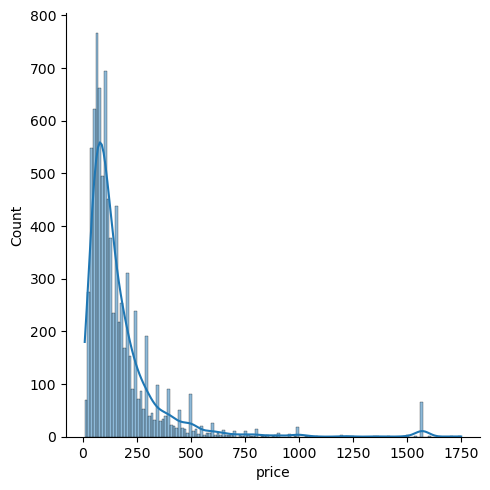

In [25]:
sns.displot(dub_listings.where(dub_listings.price < 2000)['price'],kde=True)